In [1]:
# PHASE M11 — Local Explainability (Per User)

import joblib
import shap
import numpy as np
import pandas as pd


In [6]:
import joblib
import numpy as np
import pandas as pd
import shap

# Load optimized Random Forest model
model = joblib.load("../models/random_forest_optimized.pkl")

# Load processed feature matrix
X = joblib.load("../models/X_processed.pkl")

# Load preprocessor to extract feature names
preprocessor = joblib.load("../models/preprocessor.pkl")

print("Model loaded:", type(model))
print("X shape:", X.shape)


Model loaded: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
X shape: (1338, 11)


In [7]:
# Numerical and categorical feature names from preprocessor

num_features = preprocessor.transformers_[0][2]
cat_encoder = preprocessor.transformers_[1][1]

cat_features = cat_encoder.get_feature_names_out(
    preprocessor.transformers_[1][2]
)

feature_names = list(num_features) + list(cat_features)

print("Total features:", len(feature_names))


Total features: 11


In [8]:
# Tree-based SHAP explainer (fast & exact)
explainer = shap.TreeExplainer(model)

print("SHAP TreeExplainer initialized")



SHAP TreeExplainer initialized


In [9]:
# Select one individual to explain
idx = 0   # change this index for different users

x_instance = X[idx:idx+1]
shap_values = explainer.shap_values(x_instance)

print("Explaining instance index:", idx)



Explaining instance index: 0


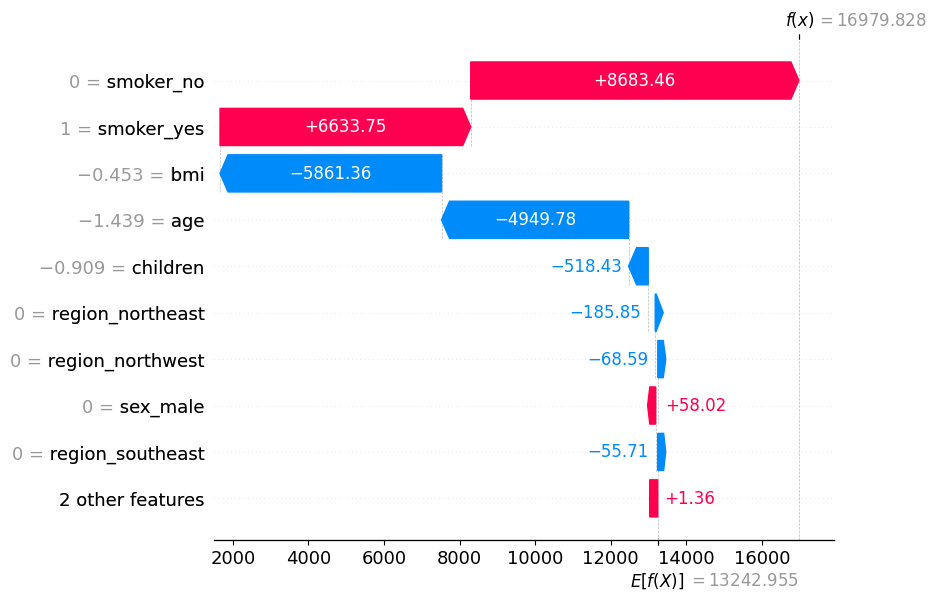

In [10]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=x_instance[0],
        feature_names=feature_names
    )
)


In [11]:
# TEXT-BASED LOCAL EXPLANATION

values = shap_values[0]
sorted_idx = np.argsort(np.abs(values))[::-1]

print("🔍 LOCAL COST EXPLANATION (TOP FACTORS)")
print("-" * 55)

for i in sorted_idx[:5]:
    direction = "INCREASES" if values[i] > 0 else "REDUCES"
    print(
        f"{feature_names[i]} {direction} predicted medical cost "
        f"by {values[i]:.2f}"
    )


🔍 LOCAL COST EXPLANATION (TOP FACTORS)
-------------------------------------------------------
smoker_no INCREASES predicted medical cost by 8683.46
smoker_yes INCREASES predicted medical cost by 6633.75
bmi REDUCES predicted medical cost by -5861.36
age REDUCES predicted medical cost by -4949.78
children REDUCES predicted medical cost by -518.43


In [12]:
print("\n📈 TOP COST-INCREASING FACTORS")
for i in sorted_idx:
    if values[i] > 0:
        print(f"{feature_names[i]}: +{values[i]:.2f}")



📈 TOP COST-INCREASING FACTORS
smoker_no: +8683.46
smoker_yes: +6633.75
sex_male: +58.02
sex_female: +44.92


In [13]:
print("\n📉 TOP COST-REDUCING FACTORS")
for i in sorted_idx:
    if values[i] < 0:
        print(f"{feature_names[i]}: {values[i]:.2f}")



📉 TOP COST-REDUCING FACTORS
bmi: -5861.36
age: -4949.78
children: -518.43
region_northeast: -185.85
region_northwest: -68.59
region_southeast: -55.71
region_southwest: -43.56


In [15]:
# Ensure correct path (go one level up from notebooks/)
save_path = f"../models/M11_local_explanation_instance_{idx}.csv"

explanation_df.to_csv(save_path, index=False)

print("Saved explanation to:", save_path)
explanation_df.head()


Saved explanation to: ../models/M11_local_explanation_instance_0.csv


,feature,shap_value
5,smoker_no,8683.462906
6,smoker_yes,6633.747275
1,bmi,-5861.363774
0,age,-4949.775873
2,children,-518.426197
